### Importing Packages

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

### Loading Data

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### General Statistics of the dataframe

In [4]:
df.shape

(150, 6)

In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [7]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.skew()

Id               0.000000
SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64

### Data Visualization

In [10]:
df = df.drop(columns={'Id'})

In [11]:
num_data = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']

<Figure size 432x432 with 0 Axes>

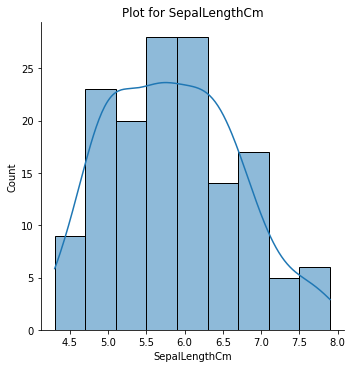

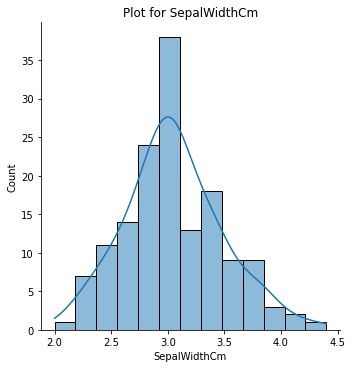

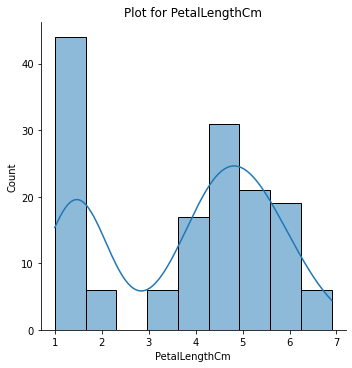

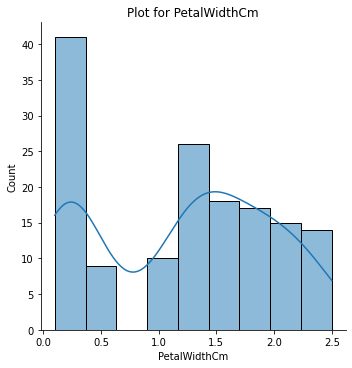

In [12]:
plt.figure(figsize=(6,6))
for i in num_data:
    sns.displot(df[i],kde=True)
    plt.title(f'Plot for {i}')

plt.show()

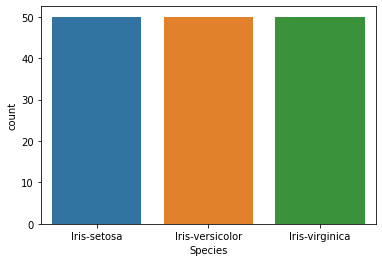

In [13]:
sns.countplot(x="Species",data=df)

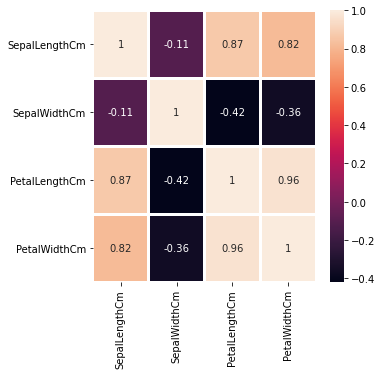

In [14]:
plt.figure(figsize=(5,5))
sns.heatmap(df[num_data].corr(),annot=True,linewidths=2)

In [15]:
df.groupby("Species")[num_data].mean()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


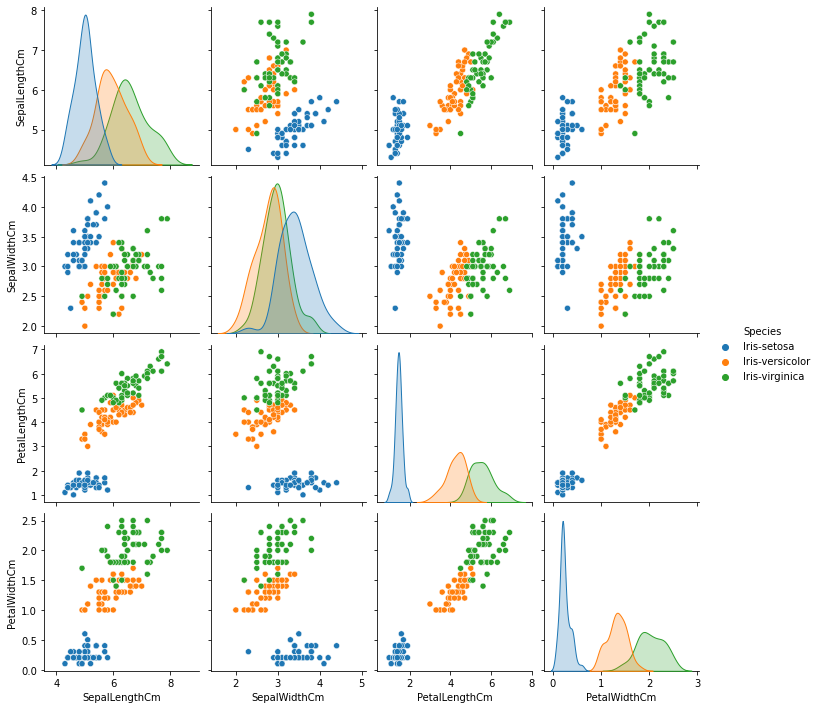

In [16]:
sns.pairplot(df,hue='Species',data=df)

### Preparing Data

In [17]:
features = df.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]

In [18]:
X=features.values

# Applying K-means clustering

In [19]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=20)
#Why 20 clusters??
#We don't know the right amount of clusters

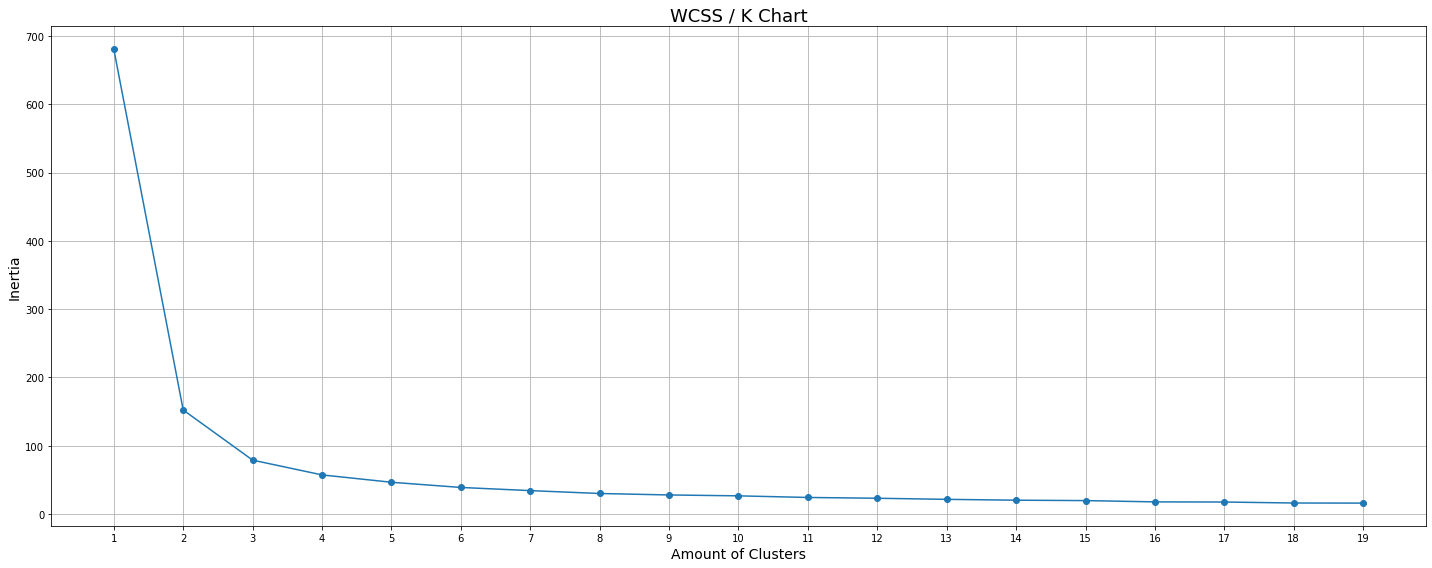

In [20]:
from sklearn.cluster import KMeans
wcss = []

for k in range(1,20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(20,8))
plt.title("WCSS / K Chart", fontsize=18)
plt.plot(range(1,20),wcss,"-o")
plt.grid(True)
plt.xlabel("Amount of Clusters",fontsize=14)
plt.ylabel("Inertia",fontsize=14)
plt.xticks(range(1,20))
plt.tight_layout()
plt.show()

### For n=2

In [21]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 10)

y = kmeans.fit_predict(X)

In [22]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Visualising clusters for K-means Algorithm

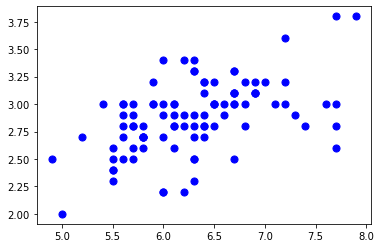

In [23]:
# For cluster 1
plt.scatter(X[y == 0, 0],X[y == 0, 1],s = 50, c = 'blue', label = 'Cluster 1')

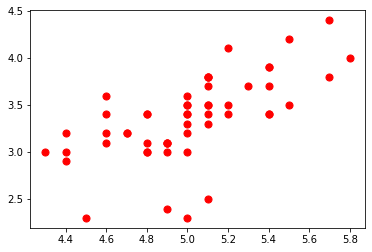

In [24]:
#For cluster 2
plt.scatter(X[y == 1, 0], X[y == 1, 1], s = 50, c = 'red', label = 'Cluster 2')

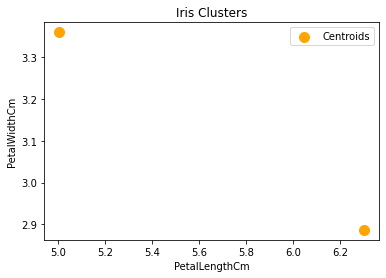

In [25]:
#Plot for centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'orange', label = 'Centroids')
plt.title('Iris Clusters')
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
plt.legend()
plt.show()

Text(0, 0.5, 'PetalWidthCm')

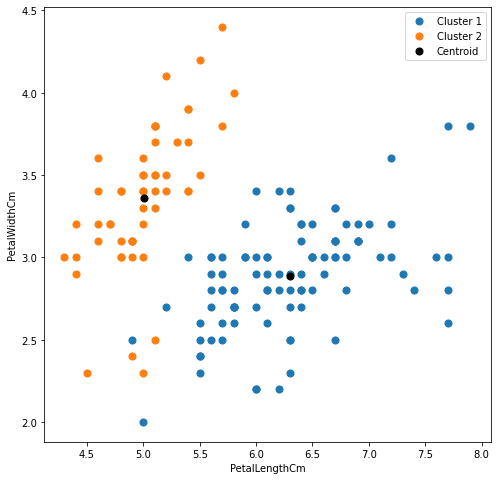

In [26]:
plt.figure(figsize=(8,8))
plt.scatter(X[y == 0,0],X[y == 0,1],label = 'Cluster 1', s = 50)
plt.scatter(X[y == 1,0],X[y == 1,1],label = 'Cluster 2', s = 50)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black' , label = 'Centroid')
plt.legend()
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")


### For n=3

In [27]:
#Initialising K-Means With Optimum Number Of Clusters
#Fitting K-Means
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 10)

#Returns a label for each data point based on the number of clusters
y = kmeans.fit_predict(X)

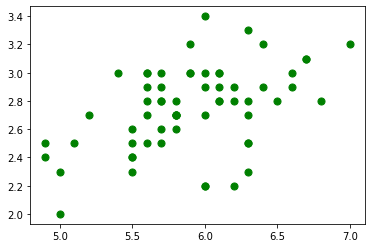

In [28]:
# For cluster 1
plt.scatter(X[y == 0, 0],X[y == 0, 1],s = 50, c = 'green', label = 'Cluster 1')

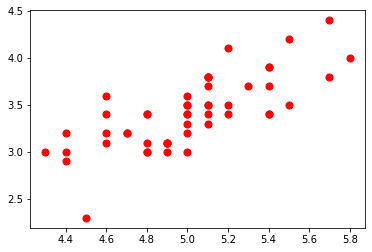

In [29]:
#For cluster 2
plt.scatter(X[y == 1, 0], X[y == 1, 1], s = 50, c = 'red', label = 'Cluster 2')

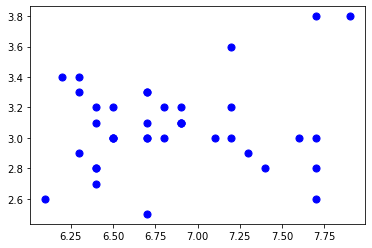

In [30]:
plt.scatter(X[y == 2, 0], X[y == 2, 1], s = 50, c = 'blue', label = 'Cluster 3')

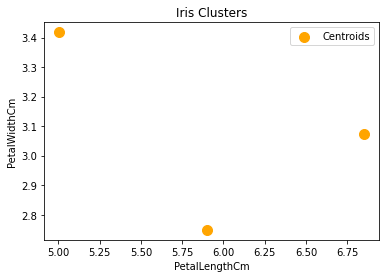

In [31]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'orange', label = 'Centroids')
plt.title('Iris Clusters')
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
plt.legend()
plt.show()

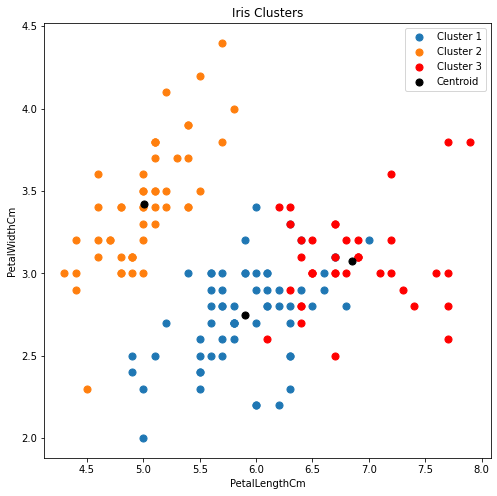

In [32]:
plt.figure(figsize=(8,8))
plt.scatter(X[y == 0,0],X[y == 0,1],label = 'Cluster 1', s = 50)
plt.scatter(X[y == 1,0],X[y == 1,1],label = 'Cluster 2', s = 50)
plt.scatter(X[y == 2,0],X[y == 2,1],label = 'Cluster 3', s = 50,c='red')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black' , label = 'Centroid')
plt.title('Iris Clusters')
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
plt.legend()
plt.show()

# Hierachial Clustering

In [33]:
from sklearn.cluster import AgglomerativeClustering
hc_cluster = AgglomerativeClustering(n_clusters=20)

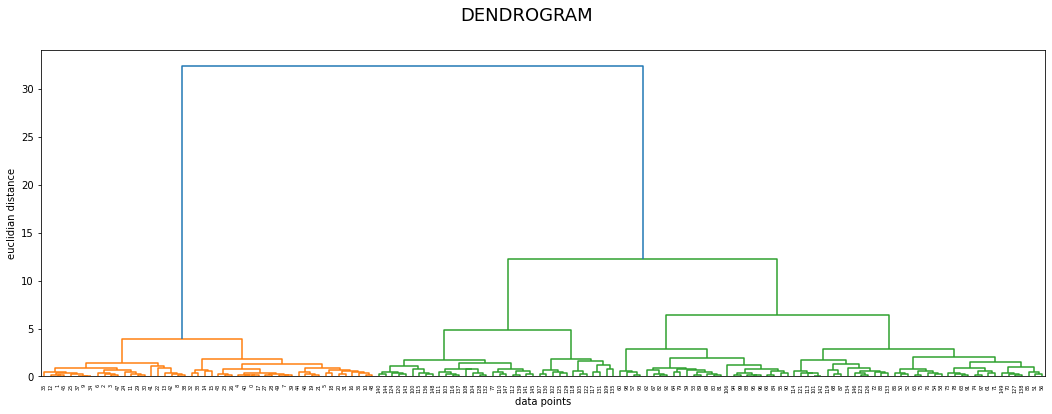

In [34]:
from scipy.cluster.hierarchy import dendrogram, linkage

merg = linkage(X,method="ward")

plt.figure(figsize=(18,6))
dendrogram(merg, leaf_rotation=90)
plt.xlabel("data points")
plt.ylabel("euclidian distance")

plt.suptitle("DENDROGRAM",fontsize=18)
plt.show()

In [35]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y = ac.fit_predict(X)

### For n=2

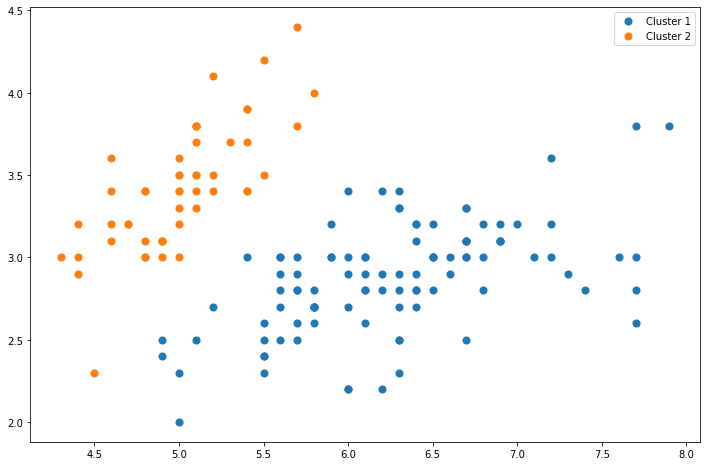

In [36]:
plt.figure(figsize=(12,8))
plt.scatter(X[y == 0,0],X[y == 0,1],label = 'Cluster 1', s = 50)
plt.scatter(X[y == 1,0],X[y == 1,1],label = 'Cluster 2', s = 50)
plt.legend()


### For n=3

In [37]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y = ac.fit_predict(X)

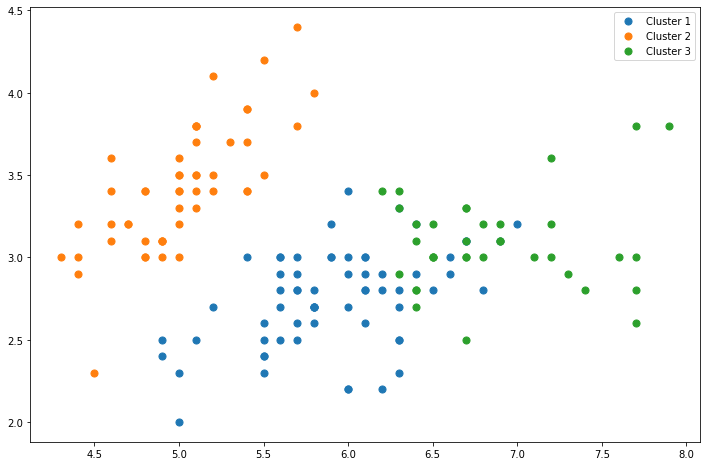

In [38]:
plt.figure(figsize=(12,8))
plt.scatter(X[y == 0,0],X[y == 0,1],label = 'Cluster 1', s = 50)
plt.scatter(X[y == 1,0],X[y == 1,1],label = 'Cluster 2', s = 50)
plt.scatter(X[y == 2,0],X[y == 2,1],label = 'Cluster 3', s = 50)
plt.legend()

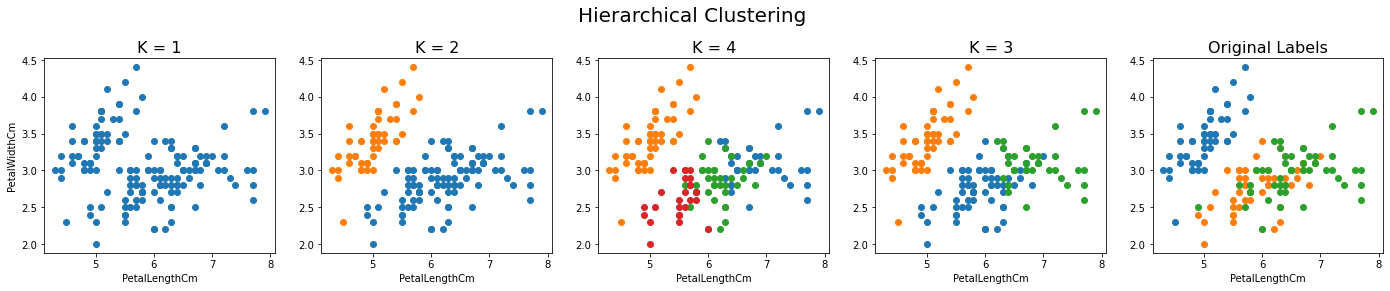

In [39]:
plt.figure(figsize=(24,4))

plt.suptitle("Hierarchical Clustering",fontsize=20)

plt.subplot(1,5,1)
plt.title("K = 1",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
plt.scatter(features.SepalLengthCm,features.SepalWidthCm)


plt.subplot(1,5,2)
plt.title("K = 2",fontsize=16)
plt.xlabel("PetalLengthCm")
hc_cluster = AgglomerativeClustering(n_clusters=2)
features["labels"] = hc_cluster.fit_predict(features)
plt.scatter(features.SepalLengthCm[features.labels == 0],features.SepalWidthCm[features.labels == 0])
plt.scatter(features.SepalLengthCm[features.labels == 1],features.SepalWidthCm[features.labels == 1])

# I drop labels since we only want to use features.
features.drop(["labels"],axis=1,inplace=True)

plt.subplot(1,5,3)
plt.title("K = 4",fontsize=16)
plt.xlabel("PetalLengthCm")
hc_cluster = AgglomerativeClustering(n_clusters=4)
features["labels"] = hc_cluster.fit_predict(features)
plt.scatter(features.SepalLengthCm[features.labels == 0],features.SepalWidthCm[features.labels == 0])
plt.scatter(features.SepalLengthCm[features.labels == 1],features.SepalWidthCm[features.labels == 1])
plt.scatter(features.SepalLengthCm[features.labels == 2],features.SepalWidthCm[features.labels == 2])
plt.scatter(features.SepalLengthCm[features.labels == 3],features.SepalWidthCm[features.labels == 3])

# I drop labels since we only want to use features.
features.drop(["labels"],axis=1,inplace=True)

plt.subplot(1,5,4)
plt.title("K = 3",fontsize=16)
plt.xlabel("PetalLengthCm")
hc_cluster = AgglomerativeClustering(n_clusters=3)
features["labels"] = hc_cluster.fit_predict(features)
plt.scatter(features.SepalLengthCm[features.labels == 0],features.SepalWidthCm[features.labels == 0])
plt.scatter(features.SepalLengthCm[features.labels == 1],features.SepalWidthCm[features.labels == 1])
plt.scatter(features.SepalLengthCm[features.labels == 2],features.SepalWidthCm[features.labels == 2])


plt.subplot(1,5,5)
plt.title("Original Labels",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.scatter(df.SepalLengthCm[df.Species == "Iris-setosa"],df.SepalWidthCm[df.Species == "Iris-setosa"])
plt.scatter(df.SepalLengthCm[df.Species == "Iris-versicolor"],df.SepalWidthCm[df.Species == "Iris-versicolor"])
plt.scatter(df.SepalLengthCm[df.Species == "Iris-virginica"],df.SepalWidthCm[df.Species == "Iris-virginica"])

plt.subplots_adjust(top=0.8)
plt.show()

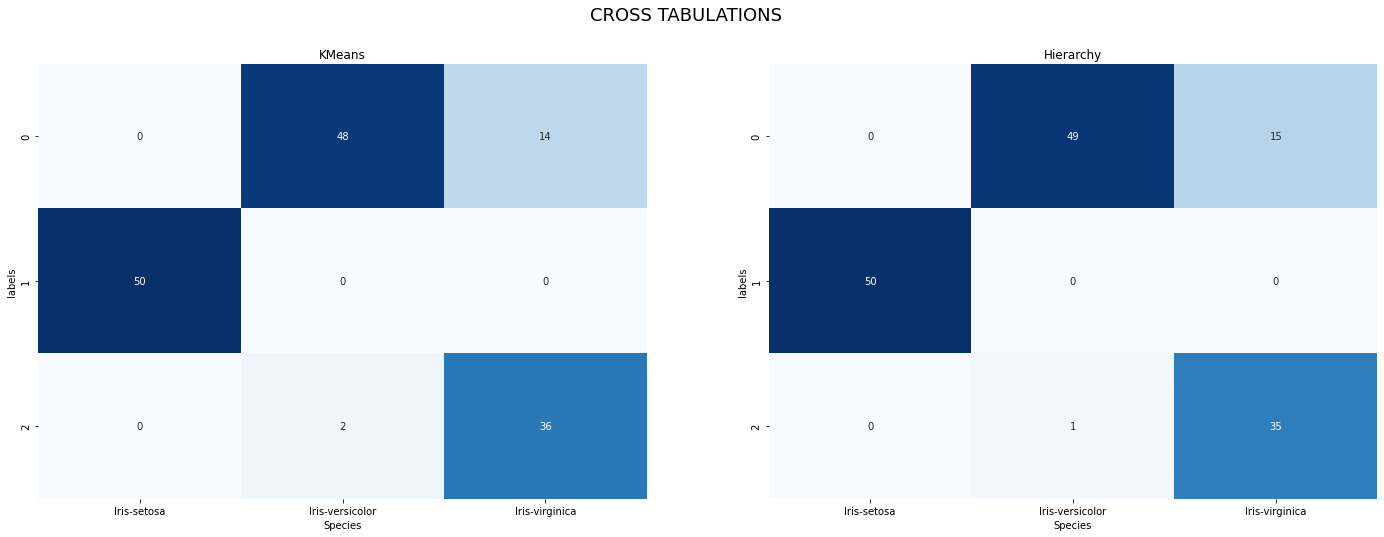

In [40]:
# I drop labels since we only want to use features.
features.drop(["labels"],axis=1,inplace=True)

# kmeans
kmeans = KMeans(n_clusters=3)
kmeans_predict = kmeans.fit_predict(features)

# cross tabulation table for kmeans
df1 = pd.DataFrame({'labels':kmeans_predict,"Species":df['Species']})
ct1 = pd.crosstab(df1['labels'],df1['Species'])


# hierarchy
hc_cluster = AgglomerativeClustering(n_clusters=3)
hc_predict = hc_cluster.fit_predict(features)

# cross tabulation table for Hierarchy
df2 = pd.DataFrame({'labels':hc_predict,"Species":df['Species']})
ct2 = pd.crosstab(df2['labels'],df2['Species'])


plt.figure(figsize=(24,8))
plt.suptitle("CROSS TABULATIONS",fontsize=18)
plt.subplot(1,2,1)
plt.title("KMeans")
sns.heatmap(ct1,annot=True,cbar=False,cmap="Blues")

plt.subplot(1,2,2)
plt.title("Hierarchy")
sns.heatmap(ct2,annot=True,cbar=False,cmap="Blues")

plt.show()